In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch# this is used for dendrogram plot
from sklearn.cluster import AgglomerativeClustering # this is used for hieraechly cluster/# create clusters
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
Univ = pd.read_csv("Universities.csv")

In [3]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [20]:
#As there is scaling effect we use standarrdization method to remove scaling
df = Univ.iloc[:,1:]#excluding Univ as it is categorical
df1 = df.values
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
rescaledX = scalar.fit_transform(df1)
univ_df = pd.DataFrame(rescaledX,columns=[['SAT','Top10','Accept','SFRatio','Expenses','GradRate']])
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [21]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [23]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [27]:
sch.linkage(Univ.iloc[:,1:], method='single')# values are biased

array([[1.20000000e+01, 1.80000000e+01, 3.19530906e+01, 2.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 7.70129859e+01, 2.00000000e+00],
       [2.00000000e+01, 2.50000000e+01, 3.37985207e+02, 3.00000000e+00],
       [1.50000000e+01, 1.70000000e+01, 3.70072966e+02, 2.00000000e+00],
       [1.10000000e+01, 2.10000000e+01, 4.99660885e+02, 2.00000000e+00],
       [5.00000000e+00, 2.60000000e+01, 5.77588089e+02, 3.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 8.40638448e+02, 2.00000000e+00],
       [1.30000000e+01, 2.80000000e+01, 1.12225443e+03, 3.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.15099131e+03, 2.00000000e+00],
       [1.40000000e+01, 3.00000000e+01, 1.29178752e+03, 4.00000000e+00],
       [2.20000000e+01, 2.30000000e+01, 1.49936653e+03, 2.00000000e+00],
       [1.00000000e+01, 1.60000000e+01, 1.58016581e+03, 2.00000000e+00],
       [3.20000000e+01, 3.50000000e+01, 1.67210018e+03, 5.00000000e+00],
       [7.00000000e+00, 3.10000000e+01, 1.73822783e

In [28]:
sch.linkage(df_norm, method='single')

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.15897416,  3.        ],
       [16.        , 28.        ,  0.16050647,  3.        ],
       [14.        , 30.        ,  0.18551392,  4.        ],
       [27.        , 31.        ,  0.18888564,  6.        ],
       [10.        , 32.        ,  0.19782036,  7.        ],
       [ 0.        , 33.        ,  0.20371384,  8.        ],
       [ 7.        , 29.        ,  0.20392243,  4.        ],
       [ 3.        , 35.        ,  0.21011957,  5.        ],
       [34.        , 36.        ,  0.22640514, 13.        ],
       [26.        , 37.        ,  0.2266892 , 15.        ],
       [19.        , 38.        ,  0.3107179 , 16.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [15.        , 40.

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [75.0, 75.0, 101.875, 101.875],
  [155.0, 155.0, 165.0, 165.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [185.0, 185.0, 203.75, 203.75],
  [175.0, 175.0, 194.375, 194.375],
  [160.0, 160.0, 184.6875, 184.6875],
  [145.0, 145.0, 172.34375, 172.34375],
  [88.4375, 88.4375, 158.671875, 158.671875],
  [235.0, 235.0, 245.0, 245.0],
  [123.5546875, 123.5546875, 240.0, 240.0],
  [52.5, 52.5, 181.77734375, 181.77734375],
  [13.75, 13.75, 117.138671875, 117.138671875]],
 'dcoord': [[0.0, 0.3945634782634699, 0.3945634782634699, 0.0],
  [0.0, 0.5423313600797574, 0.5423313600797574, 0.3945634782634699],
  [0.0, 0.5773623546938668, 0.57736235

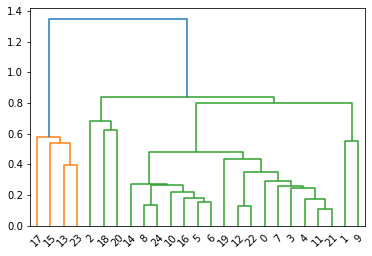

In [33]:
sch.dendrogram(sch.linkage(df_norm, method='average'))

In [34]:
sch.linkage(df_norm,method='centroid')

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.1641945 ,  3.        ],
       [16.        , 28.        ,  0.16678523,  3.        ],
       [10.        , 30.        ,  0.1936452 ,  4.        ],
       [27.        , 31.        ,  0.23384946,  6.        ],
       [14.        , 32.        ,  0.2276027 ,  7.        ],
       [ 3.        , 29.        ,  0.2343663 ,  4.        ],
       [ 7.        , 34.        ,  0.23194862,  5.        ],
       [ 0.        , 35.        ,  0.25417699,  6.        ],
       [26.        , 36.        ,  0.31097267,  8.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [19.        , 37.        ,  0.40166573,  9.        ],
       [33.        , 39.        ,  0.41471539, 16.        ],
       [15.        , 38.

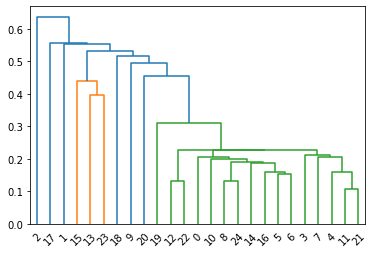

In [35]:
# create dendrogram
dendrogram_Single = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [36]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')#affinity=which method is used to calculate distance,linkage is which linkage among 4

In [40]:
hc.n_clusters

4

In [57]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)#fives the list of cluster name for all rows
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [59]:
y_hc,Clusters

(array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0], dtype=int64),
     Clusters
 0          0
 1          3
 2          1
 3          0
 4          0
 5          0
 6          0
 7          0
 8          0
 9          0
 10         0
 11         0
 12         0
 13         0
 14         0
 15         0
 16         0
 17         2
 18         0
 19         0
 20         0
 21         0
 22         0
 23         0
 24         0)

In [63]:
#atatching the cluster name to the main df 
df_norm['h_clusterid'] = Clusters
Univ['h_clusterid'] = Clusters

In [69]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [68]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,3
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0


In [75]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')#ward is centroid

In [76]:
clus = hc1.fit_predict(univ_df)
clus_df = pd.DataFrame(clus)

In [77]:
clus_df

,0
0,3
1,0
2,2
3,3
4,3
5,4
6,4
7,3
8,4
9,0
